In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

train = pd.read_csv('first_test.csv', sep=';')
train.head()

,dial_id,trues,preds,EasilyReadableText,StandardReadableText,HardlyReadableText
0,1091,1,1,1.834745e-09,1.944853e-09,1.689840e-09
1,4182,1,1,3.482936e-09,3.681718e-09,3.378960e-09
2,418,0,1,3.361131e-09,3.463673e-09,3.294675e-09
3,1719,1,1,3.852622e-09,3.951416e-09,3.398845e-09
4,2090,2,1,4.091012e-09,4.250654e-09,3.737084e-09


### Display the class distributions

In [33]:
class_balance = train.trues.value_counts()
pred_balance = train.preds.value_counts()
balance_df = pd.DataFrame({'class':['StandardReadableText', 'EasilyReadableText', 'HardlyReadableText'], 'class_val':class_balance.values.tolist()})
fig = balance_df.plot.bar(x='class', y='val')
fig.write_html("class_distributions.html")

In [52]:
class_balance = train.trues.value_counts()
class_df = pd.DataFrame({'class':['StandardReadableText', 'EasilyReadableText', 'HardlyReadableText'], 'val_class':class_balance.values.tolist()})
pred_df = pd.DataFrame({'class':['StandardReadableText', 'EasilyReadableText'], 'val_pred':pred_balance.values.tolist()})
pred_df.loc[2] = ["HardlyReadableText", 0]

distrib_df = pd.merge(class_df, pred_df, on='class', how='outer')
distrib_df

,class,val_class,val_pred
0,StandardReadableText,343,583
1,EasilyReadableText,204,15
2,HardlyReadableText,51,0


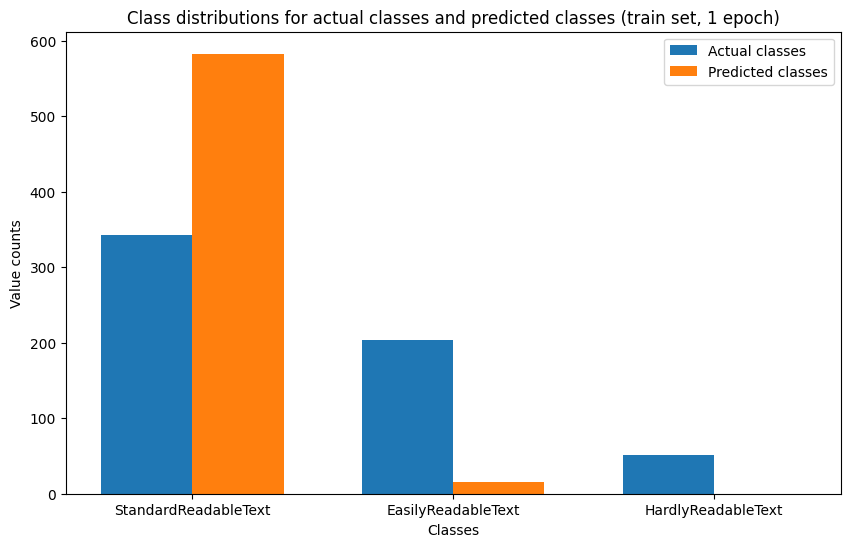

In [54]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(distrib_df))

bar1 = ax.bar(index, distrib_df['val_class'], bar_width, label='Actual classes')
bar2 = ax.bar([i + bar_width for i in index], distrib_df['val_pred'], bar_width, label='Predicted classes')

ax.set_xlabel('Classes')
ax.set_ylabel('Value counts')
ax.set_title('Class distributions for actual classes and predicted classes (train set, 1 epoch)')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(distrib_df['class'])
ax.legend()

plt.show()